# Demo for API of Intermediate Server

## 1. Imports

In [1]:
import requests
import base64
import time
from PIL import Image

## 2. Basic parameters

In [2]:
address = "http://129.114.26.30"
port = 5000
username = "jyx"
password = "test"
text = "Teemo is hiding in the bush."

url = f"{address}:{port}/"

## 3. Functions to decode transferred data

In [3]:
def base64toimg(input: str):
    input = input.encode('utf-8')
    return base64.decodebytes(input)

## 4. Entry: "/" - For connection check

In [4]:
connection_check = requests.get(url+"/")
print(connection_check)
print(connection_check.json())

<Response [200]>
{'test': 0}


## 5. Entry: "/login" and "/signup" - For user login and signup
### 5.1 Case 1: login using unregistered username-password pair

In [5]:
login_test = {
    "username": username,
    "passwd": password
}

login_check = requests.post(url+"/login", json=login_test)
print(login_check.json())

{'status': 1}


### 5.2 Case 2: Signup

In [6]:
signup_check = requests.post(url+"/signup", json=login_test)
print(signup_check.json())

{'status': 0}


### 5.3 Case 3: login using registered username-password pair

In [7]:
login_check = requests.post(url+"/login", json=login_test)
print(login_check.json())

{'status': 0}


### 5.4 Case 4: Signup using registered username_password pair

In [8]:
signup_check = requests.post(url+"/signup", json=login_test)
print(signup_check.json())

{'status': 1}


## 6. Entry: "/job" - for job submission and results fetch
### 6.1 Case 1: Job submission

In [9]:
job_post_data = {
    "username": username,
    "passwd": password,
    "text": text
}

data = requests.post(url+"/job", json=job_post_data)
job_id = data.json()["id"]
print(f"job id: {job_id}")

job id: 50300


### 6.2 Case 2: Job result fetch

In [10]:
job_get_data = {
    "username": "Jingye",
    "passwd": "test",
    "id": job_id
}

while True:
    time.sleep(5)
    data = requests.get(url+"/job", json=job_get_data)
    if data.json()["status"] == 2:
        break
    print("still waiting results, wait another 5 seconds")
print("job finished and fetched")

still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
still waiting results, wait another 5 seconds
job finished and fetched


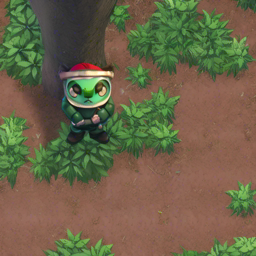

In [11]:
import io
from IPython.display import display
img_base64 = base64toimg(data.json()["img"])
decoded_string = io.BytesIO(img_base64)
display(Image.open(decoded_string))